In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, draw, io
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from skimage.filters import sobel
from matplotlib import cm


In [2]:
def phase_correlation(a, b):
    G_a = np.fft.fft2(a)
    G_b = np.fft.fft2(b)
    conj_b = np.ma.conjugate(G_b)
    R = G_a*conj_b
    R /= np.absolute(R)
    r = np.fft.ifft2(R).real
    return r

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

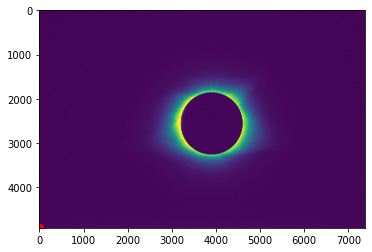

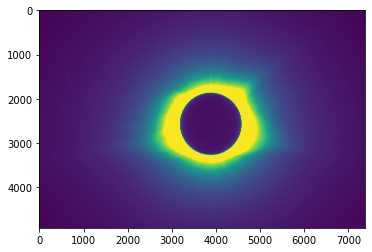

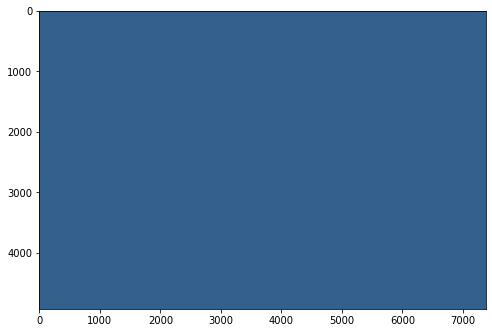

In [4]:
from scipy import misc
from matplotlib import pyplot
import numpy as np

#Get two images with snippet at different locations
# im1 = np.mean(misc.face(), axis=-1) #naive colour flattening  

# im2 = np.zeros_like(im1)    
# im2[:200,:200] = im1[200:400, 500:700]

im1= plt.imread('D:\OneDrive - IIT Delhi\Intern\BTP\Wei-Hao-20220605T090859Z-001\TIFF\TIFFDSC_4002.tiff')
im2= plt.imread('D:\OneDrive - IIT Delhi\Intern\BTP\Wei-Hao-20220605T090859Z-001\TIFF\TIFFDSC_4012.tiff')
im1 = rgb2gray(im1)
im2 = rgb2gray(im2)

corrimg = phase_correlation(im1, im2)
r,c = np.unravel_index(corrimg.argmax(), corrimg.shape)

pyplot.imshow(im1)
pyplot.plot([c],[r],'ro')
pyplot.show()

pyplot.imshow(im2)
pyplot.show()

pyplot.figure(figsize=[8,8])
pyplot.imshow(corrimg)

pyplot.show()

In [5]:
m, n=corrimg.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))


In [6]:
%matplotlib widget

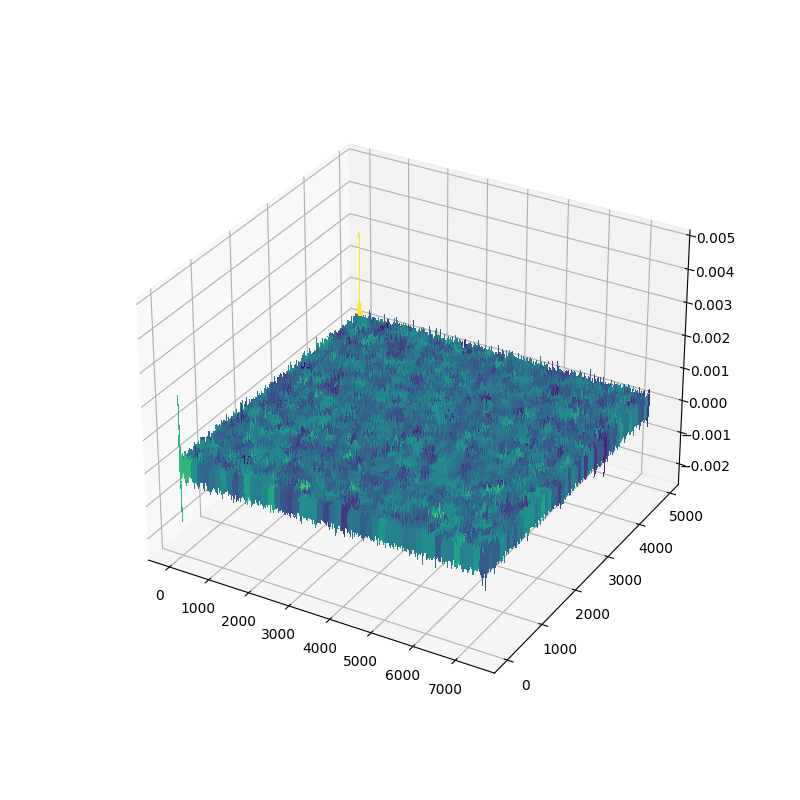

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(X,Y,corrimg, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.0025,0.005)
ax.axis("on")
#ax.set_facecolor('black')
plt.show()
